# Кейс "Выявление нетипичных операций по транзакционной активности"

#### Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

### Начинаем EDA

In [2]:
dataset = pd.read_csv('normal.csv')

In [3]:
dataset.isnull().sum()

Unnamed: 0         0
transaction_id     0
ip                 0
device_id          0
device_type        0
tran_code          0
mcc                0
client_id          0
card_type          0
pin_inc_count      0
card_status        0
expiration_date    0
datetime           0
sum                0
oper_type          0
balance            0
dtype: int64

###### Пропущенных значений нет, что очень радует

In [4]:
dataset = dataset.drop_duplicates(keep='first')

In [5]:
dataset.describe()

,Unnamed: 0,transaction_id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,card_status,sum,balance
count,53079.000000,5.307900e+04,5.307900e+04,53079.000000,53079.000000,53079.000000,5.307900e+04,53079.000000,53079.000000,53079.000000,53079.000000
mean,26539.000000,5.516405e+06,2.030333e+09,753.008026,125.476949,5505.105164,5.290013e+08,0.147441,0.998323,656.057842,523149.367494
std,15322.731806,2.639071e+06,1.098517e+09,425.396994,187.653405,2584.121275,2.559038e+08,0.404768,0.040914,320.938640,272586.082820
min,0.000000,1.000067e+06,3.971504e+07,10.000000,-1.000000,1001.000000,1.016484e+08,0.000000,0.000000,101.730000,0.000000
25%,13269.500000,3.215850e+06,7.722764e+08,384.000000,10.000000,3314.000000,3.101314e+08,0.000000,1.000000,377.960000,288596.000000
50%,26539.000000,5.493855e+06,1.605698e+09,739.000000,25.000000,5482.000000,5.123315e+08,0.000000,1.000000,660.080000,526677.780000
75%,39808.500000,7.793275e+06,3.162510e+09,1120.000000,30.000000,7750.000000,7.368897e+08,0.000000,1.000000,934.975000,762799.035000
max,53078.000000,9.999941e+06,3.647996e+09,1495.000000,991.000000,9998.000000,9.996605e+08,3.000000,1.000000,1199.270000,999769.830000


In [6]:
dataset.columns

Index(['Unnamed: 0', 'transaction_id', 'ip', 'device_id', 'device_type',
       'tran_code', 'mcc', 'client_id', 'card_type', 'pin_inc_count',
       'card_status', 'expiration_date', 'datetime', 'sum', 'oper_type',
       'balance'],
      dtype='object')

In [7]:
dataset.sample(3)

,Unnamed: 0,transaction_id,ip,device_id,device_type,tran_code,mcc,client_id,card_type,pin_inc_count,card_status,expiration_date,datetime,sum,oper_type,balance
48375,48375,7776600,2147489822,882.0,atm,25,5164,150978640,credit,0,1,2030-05-09,2023-11-12 23:35:48,677.81,international_transfer,859881.26
15257,15257,5258343,771784734,701.0,unknown,451,5637,243732473,debit,0,1,2030-12-16,2023-06-13 05:30:40,466.97,payment,415455.54
11029,11029,4861552,3154164992,831.0,unknown,10,2676,540169508,debit,0,1,2026-02-17,2023-02-01 13:27:01,813.98,incoming,251518.61


#### Поиск выбросов в переводах и балансе

In [8]:
q1_sum = dataset['sum'].quantile(0.25)
q3_sum = dataset['sum'].quantile(0.75)
iqr_sum = q3_sum - q1_sum

lower_bound_sum = q1_sum - 1.5 * iqr_sum
upper_bound_sum = q3_sum + 1.5 * iqr_sum
dataset['sum_outlier'] = (dataset['sum'] < lower_bound_sum) | (dataset['sum'] > upper_bound_sum)
outliers_sum_count = dataset['sum_outlier'].sum()
print(f"Количество выбросов в столбце 'sum': {outliers_sum_count}")

Количество выбросов в столбце 'sum': 0


In [9]:
q1_balance = dataset['balance'].quantile(0.25)
q3_balance = dataset['balance'].quantile(0.75)
iqr_balance = q3_balance - q1_balance

lower_bound_balance = q1_balance - 1.5 * iqr_balance
upper_bound_balance = q3_balance + 1.5 * iqr_balance
dataset['balance_outlier'] = (dataset['balance'] < lower_bound_balance) | (dataset['balance'] > upper_bound_balance)
outliers_balance_count = dataset['balance_outlier'].sum()
print(f"Количество выбросов в столбце 'balance': {outliers_balance_count}")

Количество выбросов в столбце 'balance': 0


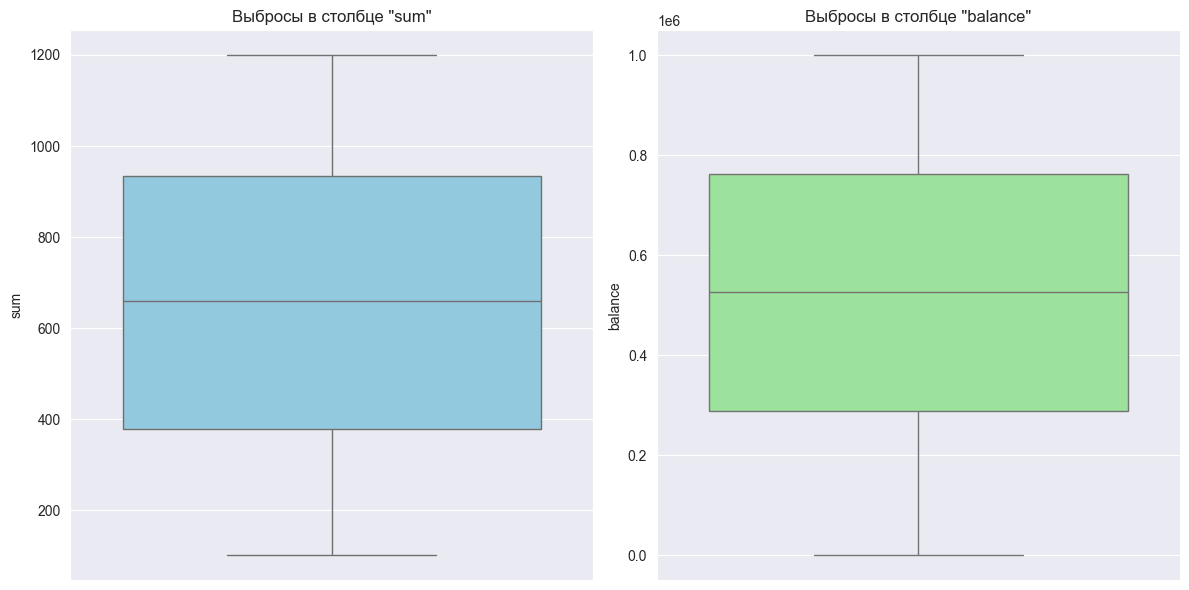

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['sum'], color='skyblue')
plt.title('Выбросы в столбце "sum"')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['balance'], color='lightgreen')
plt.title('Выбросы в столбце "balance"')

plt.tight_layout()
plt.show()

Выбросов которые могли бы помешать при обучении модели и построении графиков в балансе и сумме транзации не обнаружено

### Графики

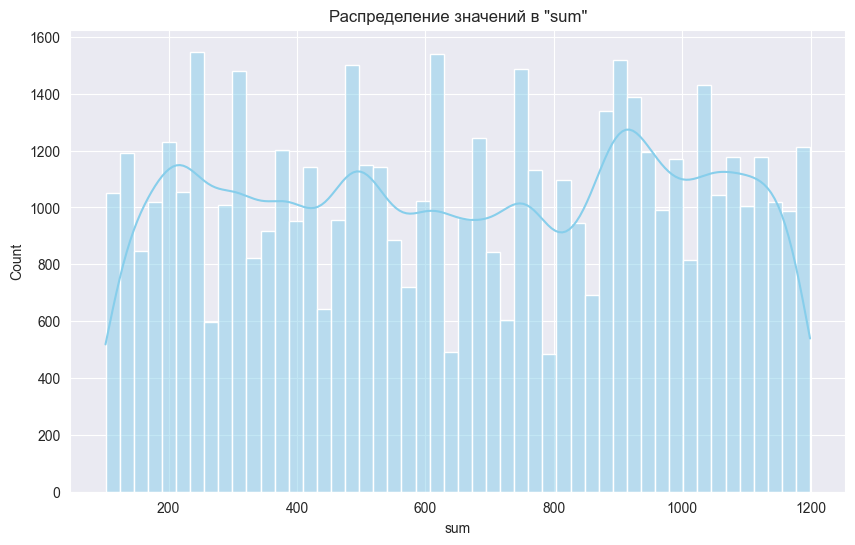

In [11]:
plt.figure(figsize=(10, 6))
plt.title('Распределение значений в "sum"')
sns.histplot(dataset['sum'], bins=50, kde=True, color='skyblue')
plt.show()

Визуально выбросов нет

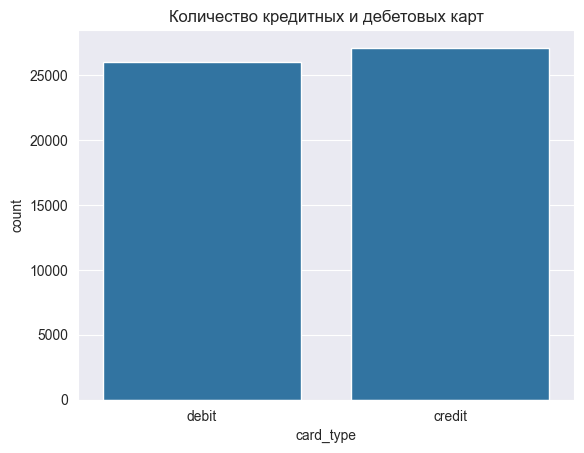

In [12]:
plt.title('Количество кредитных и дебетовых карт')
sns.countplot(x=dataset['card_type'])
plt.show()

#### Корреляционная матрица

<Axes: >

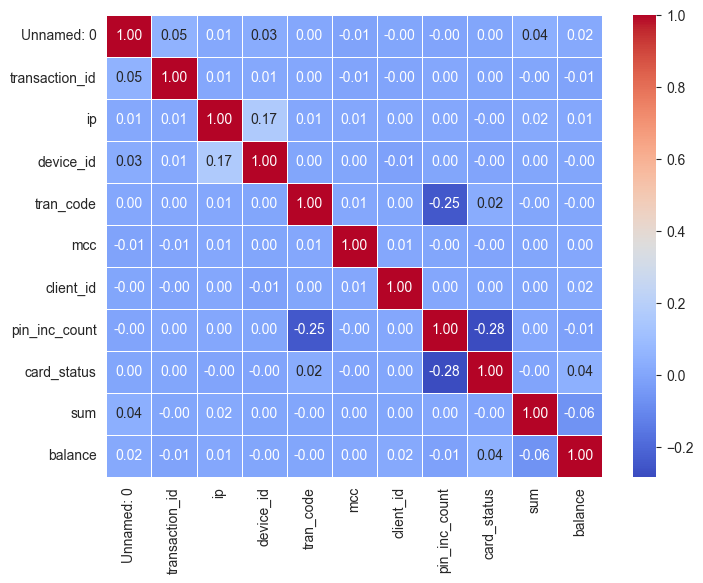

In [13]:
dataset_num = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = dataset_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Хоть у нас и "tran_code" является числом, мы можем наблюдать слабую обратную зависимость между количеством попыток ввода пинкода и кода транкзации, что логично, так как при множественных попытках ввода пинкода транзакцию могут заблокировать

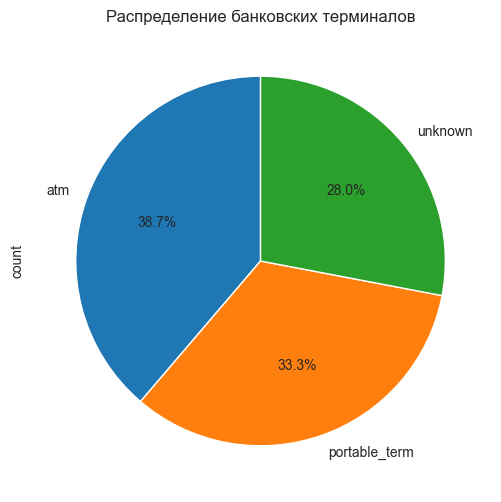

In [14]:
counts = dataset["device_type"].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Распределение банковских терминалов")
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, legend=False)
plt.show()

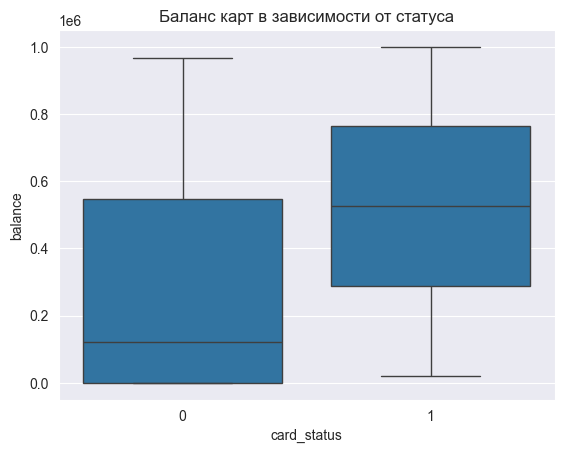

In [15]:
sns.boxplot(x="card_status", y="balance", data=dataset)
plt.title("Баланс карт в зависимости от статуса")
plt.show()

На неактивных картах денег меньше. Что довольно логично)

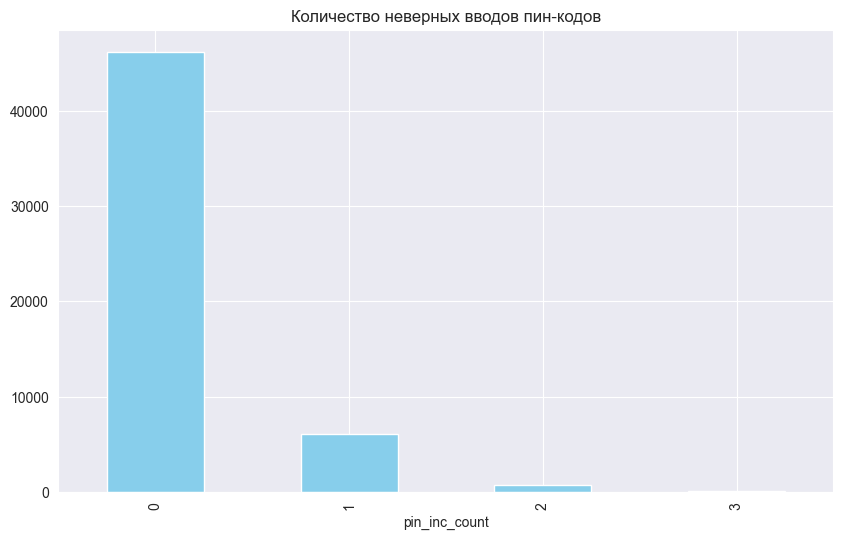

In [16]:
dataset.groupby('pin_inc_count').size().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Количество неверных вводов пин-кодов")
plt.show()

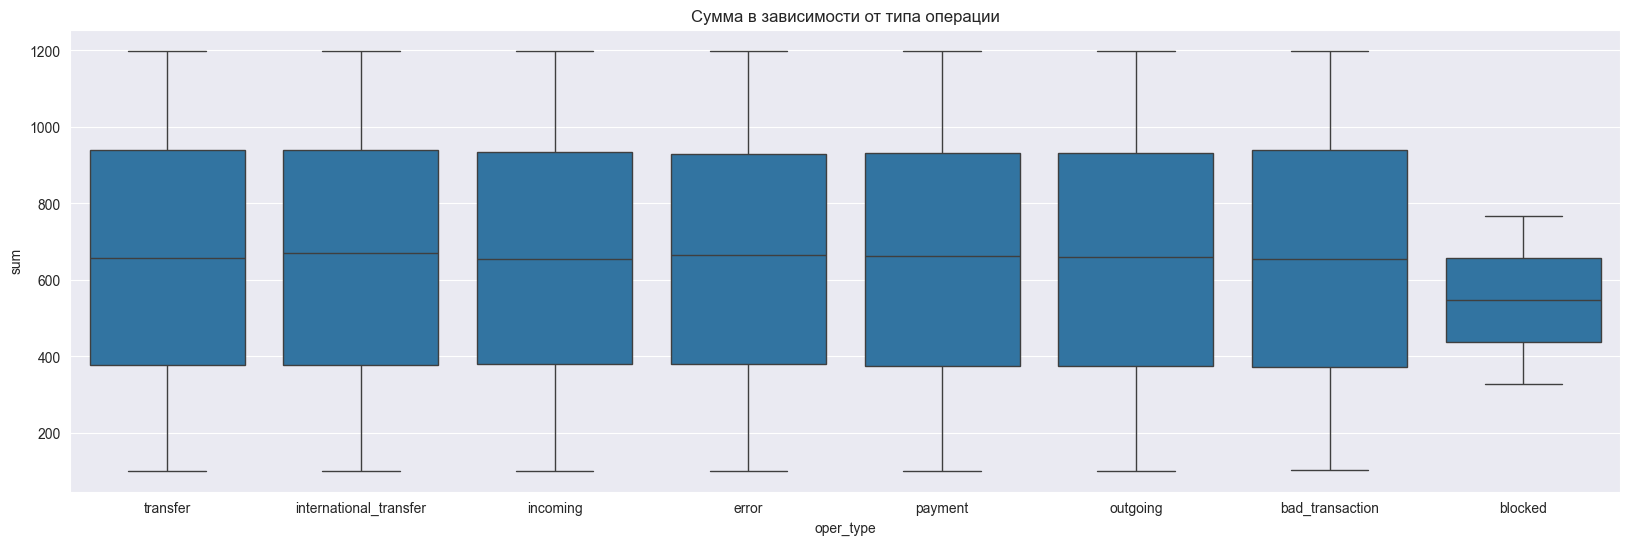

In [17]:
plt.figure(figsize=(20, 6))
plt.title('Сумма в зависимости от типа операции')
sns.boxplot(data=dataset, x='oper_type', y='sum')
plt.show()

У разних типов переводов практически одиннаковая сумма перевода. Кроме типа "blocked"

<Axes: title={'center': 'Сумма в зависимости от типа операции'}, xlabel='oper_type', ylabel='sum'>

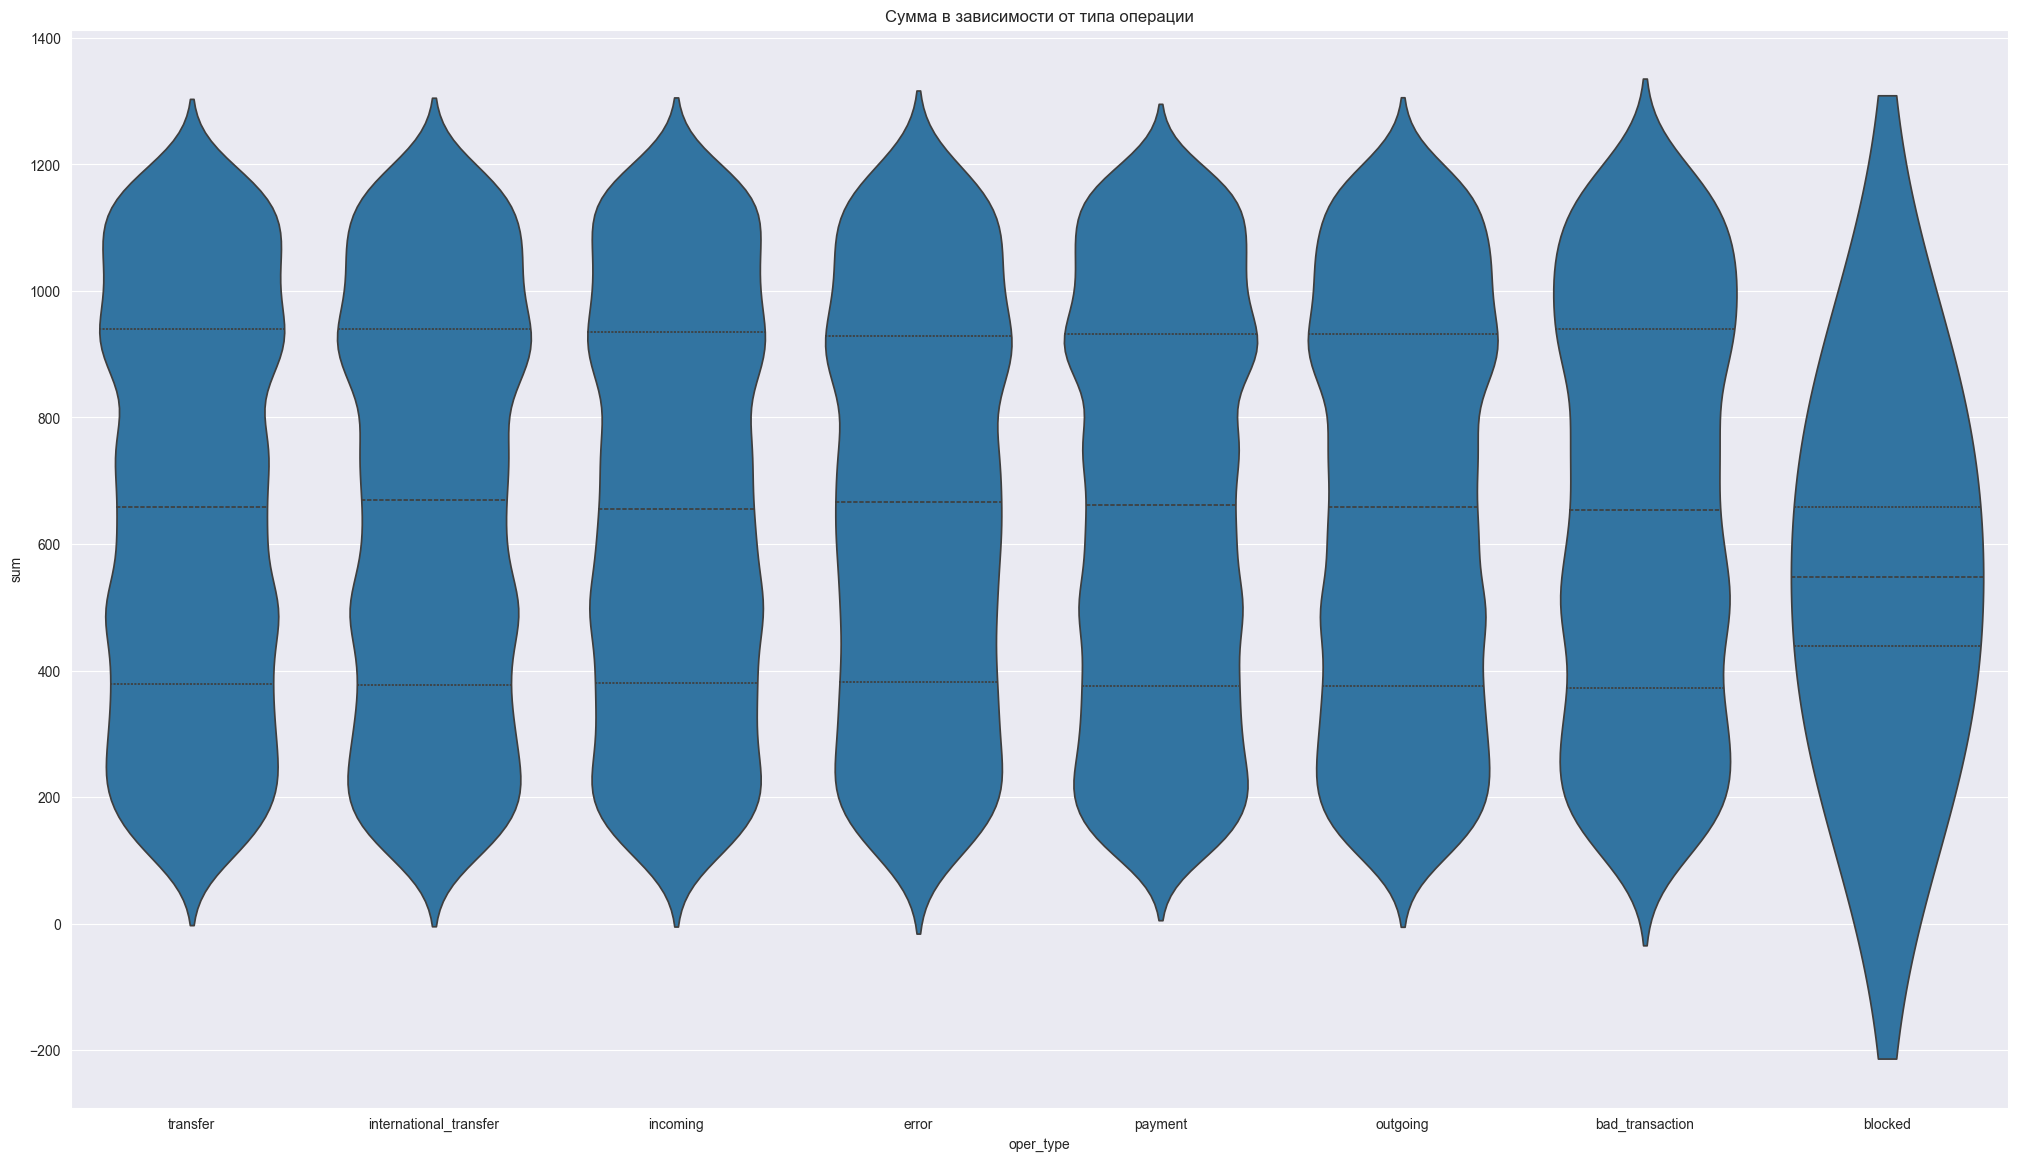

In [18]:
plt.figure(figsize=(25, 14))
plt.title('Сумма в зависимости от типа операции')
sns.violinplot(data=dataset, x='oper_type', y='sum', inner='quart')

Вот тут как раз можно заметить что у "blocked" есть транзакции с отрицательной суммой. Что повлияло на построенние графика выше

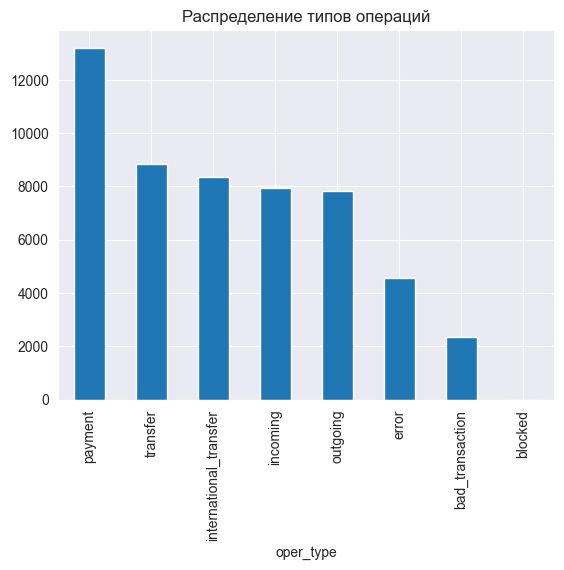

In [19]:
plt.title('Распределение типов операций')
dataset['oper_type'].value_counts().plot(kind='bar')
plt.show()

Очень мало типов "blocked". Всего лишь две штуки

In [20]:
dataset['oper_type'].value_counts()

oper_type
payment                   13204
transfer                   8826
international_transfer     8359
incoming                   7941
outgoing                   7847
error                      4550
bad_transaction            2350
blocked                       2
Name: count, dtype: int64

#### Работа с ip-адресами

ip
3280928963    110
3166633999    104
620788585     101
3240034394    100
771797172     100
3104899102     99
620788480      98
2533369464     98
3164733590     97
3275358343     97
dtype: int64


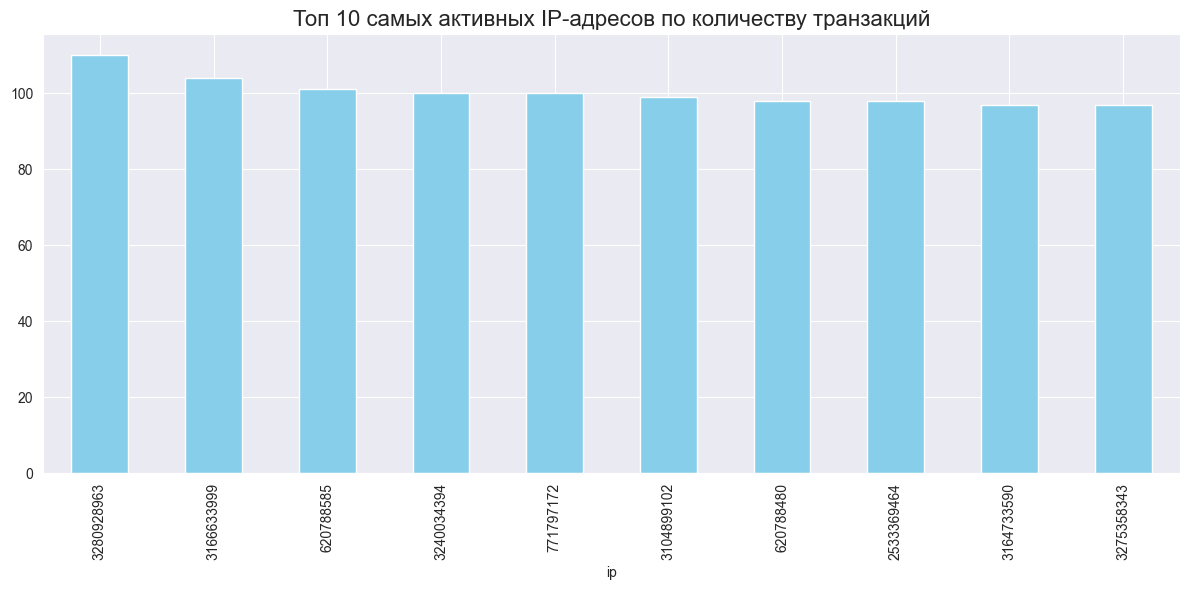

In [21]:
top_10_active_ips = dataset.groupby('ip').size().sort_values(ascending=False).head(10)
print(top_10_active_ips)
plt.figure(figsize=(12, 6))
plt.title('Топ 10 самых активных IP-адресов по количеству транзакций', fontsize=16)
top_10_active_ips.plot(kind='bar', color='skyblue')
plt.tight_layout()
plt.show()

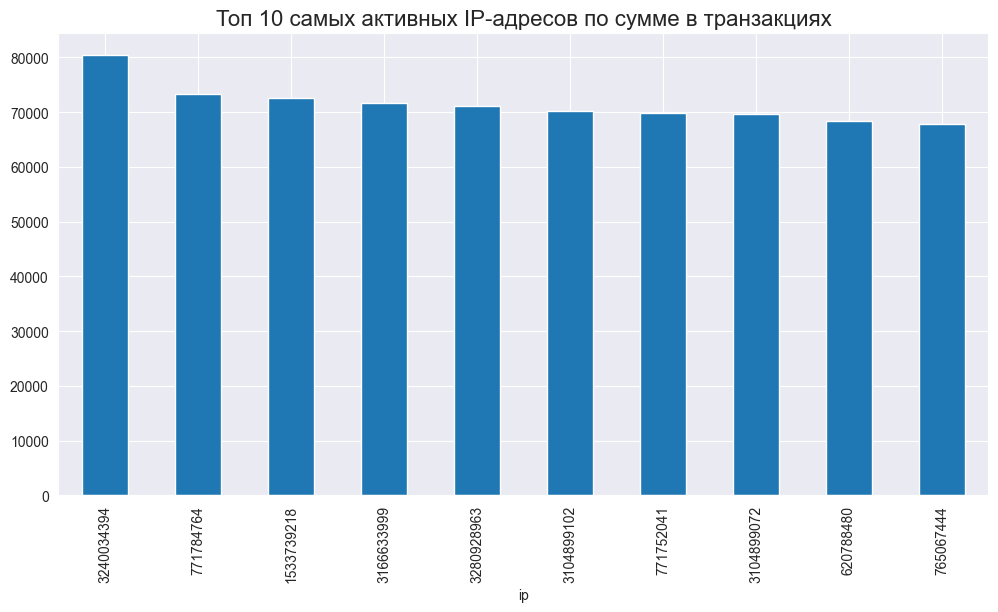

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Топ 10 самых активных IP-адресов по сумме в транзакциях', fontsize=16)
dataset.groupby('ip')['sum'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Сумма переводов с самых активных айпи-адресов, может помочь выявить фрод транзакцию, если слишком много действий с одного адреса.

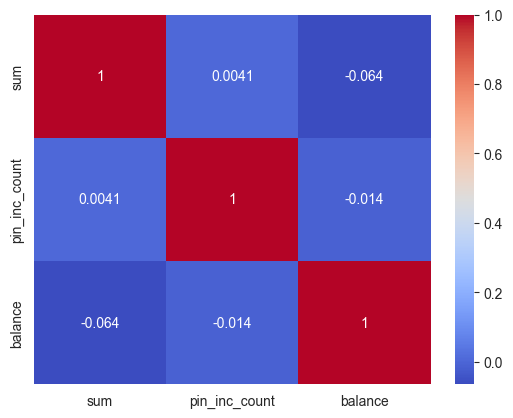

In [23]:
corr_matrix = dataset[['sum', 'pin_inc_count', 'balance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Никакой корреляции между между этими столбцами нет. Было предположение что фрод транзакция постарается увести все деньги, а из-за того что это фрод, количество попыток ввода пинкода будет больше

<Axes: ylabel='count'>

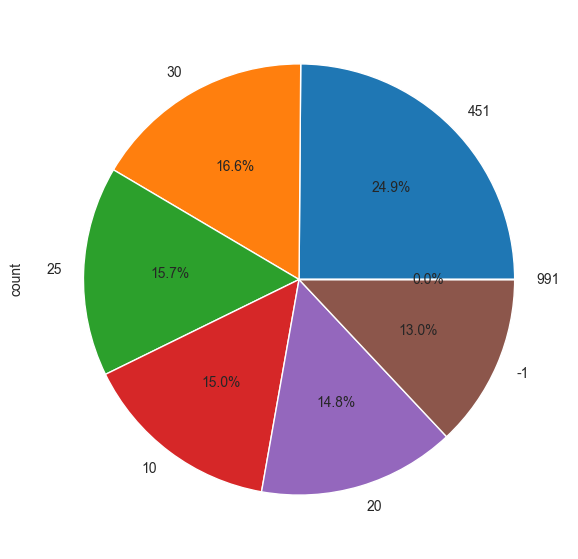

In [24]:
dataset['tran_code'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))

Всего 13% транзакций со статусом -1, который скорее всего означает блокировку/заморозку

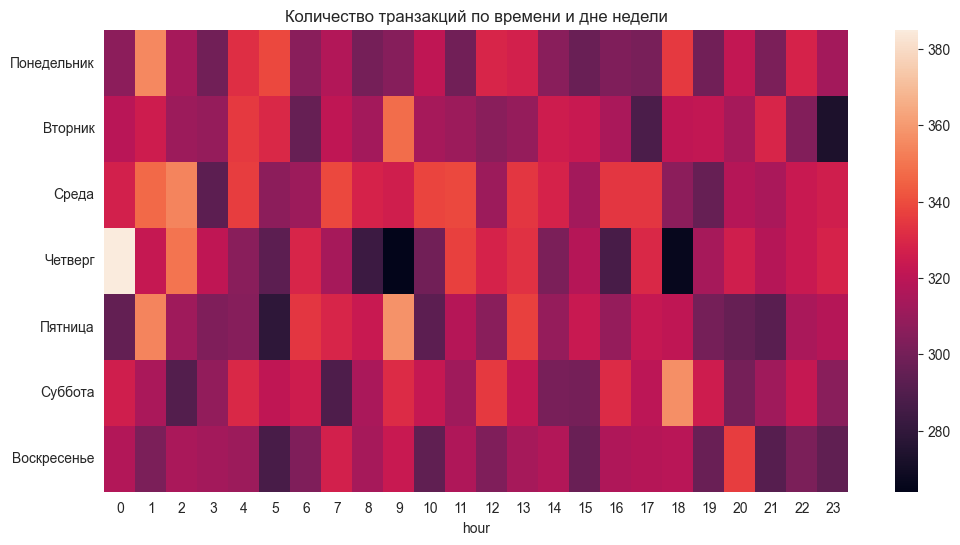

In [25]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
day_names = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
dataset['hour'] = dataset['datetime'].dt.hour
pivot = dataset.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)
pivot.index = [day_names[i] for i in pivot.index]
plt.figure(figsize=(12, 6))
plt.title("Количество транзакций по времени и дне недели")
sns.heatmap(pivot, annot=False, fmt='d')
plt.show()

Нет никаких зависимостей между днём недели и временем. Пик пришёлся на 12 ночи в четверг, что никак нельзя объяснить